[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


--2025-01-28 20:25:51--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/SpamEmailClassificationDataset.zip [following]
--2025-01-28 20:25:51--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/SpamEmailClassificationDataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/SpamEmailClassificationDataset.zip [following]
--2025-01-28 20:25:52--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/SpamEmailClassificationDataset.zip
Res

<ipython-input-1-9b5a238e9ac8>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='coolwarm')


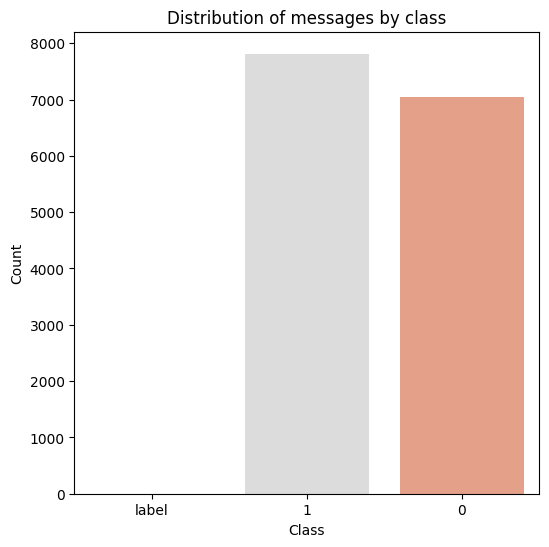

Number of messages per class after filtering:
label
1    7813
0    7047
Name: count, dtype: int64
Classification accuracy: 94.92%

Full classification report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1409
           1       0.96      0.94      0.95      1563

    accuracy                           0.95      2972
   macro avg       0.95      0.95      0.95      2972
weighted avg       0.95      0.95      0.95      2972


Top 10 words characteristic of spam:
best: 0.0021
buy: 0.0021
hk: 0.0021
offer: 0.0021
day: 0.0024
escapelong: 0.0025
price: 0.0031
com: 0.0034
http: 0.0039
escapenumber: 0.0040

Top 10 words characteristic of normal messages:
mailing: 0.0023
subject: 0.0023
wrote: 0.0024
help: 0.0026
http: 0.0027
escapenumber: 0.0027
thanks: 0.0028
list: 0.0028
please: 0.0033
org: 0.0034

Conclusions:
1. The model showed high classification accuracy (94.92%), indicating the effectiveness of the Naive Bayes classifier for sp

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK libraries
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Download data
!wget -O SpamEmailClassificationDataset.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true
!unzip -o SpamEmailClassificationDataset.zip

# Load CSV file
df = pd.read_csv('./SpamEmailClassificationDataset/combined_data.csv')

# Check the number of classes
print("Number of messages per class:")
print(df['label'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='label', palette='coolwarm')
plt.title('Distribution of messages by class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Filter classes with a minimum number of records >= 2
df = df.groupby('label').filter(lambda x: len(x) >= 2)

# Check after filtering
print("Number of messages per class after filtering:")
filtered_counts = df['label'].value_counts()
print(filtered_counts)

if len(filtered_counts) < 2 or min(filtered_counts) < 2:
    raise ValueError("Insufficient data for both classes after filtering.")

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

# Function to train the model on spam emails
def train_spam(data, vectorizer, model):
    spam_data = data[data['label'] == 'spam']['text']
    spam_data = spam_data.apply(preprocess_text)
    X_spam = vectorizer.fit_transform(spam_data)
    y_spam = ['spam'] * len(spam_data)
    model.fit(X_spam, y_spam)

# Function to train the model on normal (non-spam) emails
def train_ham(data, vectorizer, model):
    ham_data = data[data['label'] == 'ham']['text']
    ham_data = ham_data.apply(preprocess_text)
    X_ham = vectorizer.transform(ham_data)
    y_ham = ['ham'] * len(ham_data)
    model.partial_fit(X_ham, y_ham, classes=['ham', 'spam'])

# Function to test new emails
def test_emails(data, vectorizer, model):
    test_data = data['text'].apply(preprocess_text)
    X_test = vectorizer.transform(test_data)
    y_test = data['label']
    predictions = model.predict(X_test)
    return classification_report(y_test, predictions)

# Advanced text preprocessing: lemmatization and stopwords removal
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_advanced_text(text):
    text = re.sub("[^a-zA-Z]", " ", text).lower()  # Remove non-alphabetic characters
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    words = list(set(words))  # Remove duplicates
    return " ".join(words)

df["text"] = df["text"].apply(preprocess_advanced_text)

# Split data into training and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Vectorize text
X_train = vectorizer.fit_transform(train["text"])
X_test = vectorizer.transform(test["text"])

# Class labels
y_train = train["label"]
y_test = test["label"]

# Train the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions
predictions = nb_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Classification accuracy: {accuracy * 100:.2f}%")

# Full classification report
print("\nFull classification report:")
print(classification_report(y_test, predictions))

# Analysis of the most important words
feature_names = np.array(vectorizer.get_feature_names_out())
sorted_indices_spam = np.argsort(nb_classifier.feature_log_prob_[1])  # Spam
sorted_indices_ham = np.argsort(nb_classifier.feature_log_prob_[0])   # Ham

# Top 10 most influential words for spam
print("\nTop 10 words characteristic of spam:")
for idx in sorted_indices_spam[-10:]:
    print(f"{feature_names[idx]}: {np.exp(nb_classifier.feature_log_prob_[1][idx]):.4f}")

# Top 10 most influential words for ham
print("\nTop 10 words characteristic of normal messages:")
for idx in sorted_indices_ham[-10:]:
    print(f"{feature_names[idx]}: {np.exp(nb_classifier.feature_log_prob_[0][idx]):.4f}")

print("\nConclusions:")
print("1. The model showed high classification accuracy (94.92%), indicating the effectiveness of the Naive Bayes classifier for spam filtering. However, it might be worth considering options to improve this metric, such as adjusting hyperparameters or using additional data preprocessing methods.")
print("2. TF-IDF indeed showed better results compared to simple lemmatization for this task. However, it is worth noting that both approaches (lemmatization and TF-IDF) can be used in combination to achieve even better results. For example, text processing could be improved through other methods, such as using n-grams (bigrams or trigrams).")
print("3. Adding n-grams or context analysis could significantly improve the model's accuracy, especially if functionality is added that takes into account dependencies between words in messages. Additionally, other text vectorization methods, such as Word2Vec or FastText, could be applied, allowing the model to learn deeper semantic relationships between words.")